In [1]:
import re

import pandas as pd
import numpy as np
import os

import seaborn as sns
from matplotlib import pyplot as plt
from imblearn.over_sampling import RandomOverSampler

## Concatenate Dataset into one File

In [2]:
from typing import List, Dict
import os
import shutil


def convertToTxt(filename: str):
    createDirec("raw_data")
    shutil.copy("all_data/{}.csv".format(filename), "raw_data/{}.txt".format(filename))
    f = open("raw_data/{}.txt".format(filename), mode="r", encoding="utf8")
    oldList = f.readlines()
    list = [x.split(",")[0] + "\n" for x in oldList]
    list = list[1:]
    f.close()
    f = open("raw_data/{}.txt".format(filename), mode="w", encoding="utf8")
    f.writelines(list)
    f.close()
    print(oldList[1])
    print(list[0])


def createDirec(directory: str):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
        print("Success")
    except:
        print("fail")


def eraseSpace(directory: str):
    files = getFileNameFromDir(direc=directory)
    for file in files:
        realFile = open("{}/{}".format(directory, file), mode="r", encoding="UTF-8")
        data = [f for f in realFile if f.strip()]
        realFile.close()
        realFile = open("{}/{}".format(directory, file), mode="w", encoding="UTF-8")
        realFile.writelines(data)
        realFile.close()


def getFileNameFromDir(direc: str) -> List[str]:
    return [f for f in os.listdir("{}/".format(direc))]


def restructureFile(direcToScan: str, f: str):
    data = pd.read_csv("{}/{}".format(direcToScan, f), encoding="UTF-8")
    data.rename(columns=({"Questions": "Question", "Intents": "Intent"}), inplace=True)
    print(f)
    data["Question"].dropna(inplace=True)
    if data.isnull().any().any():
        print(data.columns())
        print(data.isna().sum())
        print(data.head())

    data.to_csv("{}/{}".format(direcToScan, f), encoding="UTF-8", index=False)
    return data


def myConcat(direcToScan: str, outputFilename: str, outputDirec: str = "all_data"):
    files = getFileNameFromDir(direc=direcToScan)

    datasets = pd.concat([restructureFile(direcToScan=direcToScan, f=f) for f in files], axis=0, ignore_index=True)

    datasets.to_csv("{}/{}.csv".format(outputDirec, outputFilename), index=False)


def myOversampling(fileName: str):
    temp = pd.read_csv("all_data/{}.csv".format(fileName))

    y = temp["Intent"]
    X = temp.drop("Intent", axis=1)

    ros = RandomOverSampler(random_state=0)
    ros.fit(X, y)
    X_resampled, y_resampled = ros.fit_resample(X, y)

    newTable = X_resampled
    newTable["Intent"] = y_resampled
    createDirec(directory="oversampling")
    newTable.to_csv("oversampling/{}.csv".format(fileName), index=False)
    return newTable

In [3]:
""  ## Concatenate All Dataset into one File
myConcat(direcToScan="datasets", outputFilename="all_data_dataset")

## Concatenate All Entity-tag Dataset into one File
myConcat(direcToScan="entity-tag", outputFilename="all_entity_dataset")

## Concatenate All Segmentation Dataset into one File
myConcat(direcToScan="segments", outputFilename="all_segment_dataset")

## Concatenate All Segmentation Dataset into one File
myConcat(direcToScan="POS/", outputFilename="all_pos_dataset")

AskAboutAcademicFee.csv
AskAboutAccountantRoom.csv
AskAboutAge.csv
AskAboutCarParkingFee.csv
AskAboutClubInfo.csv
AskAboutCompetition.csv
AskAboutCS_CourseInEachGen.csv
AskAboutDormInfo.csv
AskAboutEC_CourseInEachGen.csv
AskAboutEnrollmentRequirement.csv
AskaboutFemaleDressCode.csv
AskAboutInterest.csv
AskAboutLocation.csv
AskaboutMaleDressCode.csv
AskAboutMinistry.csv
AskAboutMotocycleParkingFee.csv
AskAboutParkingPrice.csv
AskAboutProvince.csv
AskAboutRegisterDate.csv
AskAboutSchoolMajors.csv
AskAboutStudyHour.csv
AskAboutTN_CourseInEachGen.csv
AskCurrentProject.csv
AskHowToComplain.csv
AskWhereHRRoomIs.csv
AskWhetherJobAnnoucementExist.csv
AskWhetherPoepleWorkonExactDate.csv
AskWorkingDate.csv
FindAnnouncementInfo.csv
FindbusStationNearCADT.csv
FindClub.csv
FindClubRoom.csv
FindCSInfo.csv
FindCurrentTime.csv
FindECInfo.csv
FindEnrollmentLocation.csv
FindResearcherRoom.csv
FindTNInfo.csv
FindTotalStudents.csv
FindTSC.csv
IsCanteenExist.csv
IsExistDoorExit.csv
IsFootballFieldExist.csv

## Erase blank from files

In [4]:
try:
    eraseSpace(directory="datasets")
    eraseSpace(directory="entity-tag")
    eraseSpace(directory="POS")
    eraseSpace(directory="segments")
    print("Success")
except:
    print("fail")


Success


## Applied OverSampling to DataSets

In [5]:
newTable = myOversampling(fileName="all_segment_dataset")
newTable

Success


,Question,Intent
0,តើ ប្រាប់ ពី តម្លៃ សិក្សា របស់ សាលា ស៉ីអេឌីធី,AskAboutAcademicFee
1,តើ ប្រាប់ ពី តម្លៃ សិក្សា របស់ សាលា CADT,AskAboutAcademicFee
2,តើ ខ្ញុំ ចង់ ដឹង ពី តម្លៃ ពី តម្លៃ សិក្សា របស់...,AskAboutAcademicFee
3,តើ ខ្ញុំ ចង់ ដឹង ពី តម្លៃ ពី តម្លៃ សិក្សា របស់...,AskAboutAcademicFee
4,តើ សូម ប្រាប់ ខ្ញុំ ពី តម្លៃ សិក្សា របស់ សាលា ...,AskAboutAcademicFee
...,...,...
172849,ចំណុច ល្អ អ្វី ខ្លះ ដែល សិស្សជនិស្សិត ជ្រើស រើ...,WhyShouldChooseCADT
172850,មាន លក្ខណៈ ពិសេស អ្វី ខ្លះ ដែល សិស្សជនិស្សិត ជ...,WhyShouldChooseCADT
172851,ហេតុ អ្វី ហេតុ ផល អ្វី ខ្លះ ដែល ដែល សិស្សជនិស្...,WhyShouldChooseCADT
172852,មាន លក្ខណៈ ពិសេស អ្វី ខ្លះ ដែល យើង គូរ តែ ជ្រើ...,WhyShouldChooseCADT



## Compare whether there's equal file or not

In [6]:
data = getFileNameFromDir("datasets")
seg = getFileNameFromDir("segments")
pos = getFileNameFromDir("pos")
ent = getFileNameFromDir("entity-tag")
if len(data) != len(seg) != len(pos) != len(ent):
    print("not equal")
    for x in zip(data, seg, pos, ent):
        if data != seg != pos != ent:
            print("data: {} ".format(data))
else:
    print("equal")

equal


## Check for any null or space data

In [7]:
def checkNullOrSpace():
    count: int = 0
    checkDict: Dict[str, List[str]] = {
        "datasets": getFileNameFromDir("datasets"),
        "segments": getFileNameFromDir("segments"),
        "pos": getFileNameFromDir("pos"),
        "entity-tag": getFileNameFromDir("entity-tag"),
    }

    for direc, v in checkDict.items():
        for filename in v:
            data = pd.read_csv("{}/{}".format(direc, filename))
            if data.isnull().any().any():
                print("{} file of direc {} have null at:".format(filename, direc))
                print(data[data["Question"].isnull()])
                count += 1

    if count == 0:
        print("No null sentence in any files detected")


checkNullOrSpace()

No null sentence in any files detected


## Compare Ner length, POS length, and SEG Length

In [8]:
from pandas import DataFrame


# def findDiffLengthSentence(allSegDataset: DataFrame, allEntityDataset: DataFrame, allPosDataset: DataFrame):
#     myTempDict = {}
#     indexs = allEntityDataset.index.tolist()
#     segs = allSegDataset["Question"].to_list()
#     tags = allSegDataset["Intent"].to_list()
#     ents = allEntityDataset["Question"].to_list()
#     poss = allPosDataset["Question"].to_list()
#
#     for seg, tag, ent, pos, index in zip(segs, tags, ents, poss, indexs):
#         if len(str(seg).split()) is not len(str(pos).split()) is not len(str(ent).split()):
#             myTempDict.setdefault("index", []).append(index)
#             myTempDict.setdefault("intent", []).append(tag)
#             myTempDict.setdefault("length_seg", []).append(len(str(seg).split()))
#             myTempDict.setdefault("length_pos", []).append(len(str(pos).split()))
#             myTempDict.setdefault("length_ent", []).append(len(str(ent).split()))
#             myTempDict.setdefault("seg", []).append(seg)
#             myTempDict.setdefault("pos", []).append(pos)
#             myTempDict.setdefault("ent", []).append(ent)
#
#     errorPd = pd.DataFrame.from_dict(myTempDict)
#     errorPd.to_csv("all_data/diff_length_sentences.csv", index=False)

In [9]:
temp = pd.read_csv("POS/AskWhereHRRoomIs.csv")
# temp.head()
temp.isna().sum()

Question    0
Intent      0
dtype: int64

In [10]:
allSegFileName = getFileNameFromDir(direc="segments")
# allPosFileName = getFileNameFromDir(direc="pos")
# allEntityFileName = getFileNameFromDir(direc="entity-tag")

myTempDict = {}
ree = ""
# Loop Through each file name to read csv
for file in allSegFileName:
    file = file.replace(" ", "")
    allEntityDataset = pd.read_csv("entity-tag/{}".format(file))
    allPosDataset = pd.read_csv("POS/{}".format(file))
    allSegDataset = pd.read_csv("segments/{}".format(file))
    if allEntityDataset["Intent"][0] != ree:
        ree = allEntityDataset["Intent"][0]
        print(ree)

    indexs = allEntityDataset.index.tolist()
    segs = allSegDataset["Question"].to_list()
    tags = allSegDataset["Intent"].to_list()
    ents = allEntityDataset["Question"].to_list()
    poss = allPosDataset["Question"].to_list()

    # loop through the csv to find wrong sentence length
    for seg, tag, ent, pos, index in zip(segs, tags, ents, poss, indexs):
        lengthEnt = len(str(ent).split())
        lengthSeg = len(str(seg).split())
        lengthPos = len(str(seg).split())
        if lengthSeg != lengthPos or lengthSeg != lengthEnt:
            myTempDict.setdefault("index", []).append(index)
            myTempDict.setdefault("intent", []).append(tag)
            myTempDict.setdefault("length_seg", []).append(len(str(seg).split()))
            myTempDict.setdefault("length_pos", []).append(len(str(pos).split()))
            myTempDict.setdefault("length_ent", []).append(len(str(ent).split()))
            myTempDict.setdefault("seg", []).append(seg)
            myTempDict.setdefault("pos", []).append(pos)
            myTempDict.setdefault("ent", []).append(ent)

errorPd = pd.DataFrame.from_dict(myTempDict)
errorPd.to_csv("all_data/diff_length_sentences.csv", index=False)

AskAboutAcademicFee
AskAboutAccountantRoom
AskAboutAge
AskAboutCarParkingFee


FileNotFoundError: [Errno 2] No such file or directory: 'entity-tag/AskAboutClubInfo.csv'

In [11]:
from pandas.errors import EmptyDataError

try:
    wrongSentence = pd.read_csv("all_data/diff_length_sentences.csv")

    print("length_seg: ", wrongSentence["length_seg"].count())
    print("length_pos: ", wrongSentence["length_pos"].count())
    print("length_ent: ", wrongSentence["length_ent"].count())
    print("seg: ", wrongSentence["seg"].count())
    print("pos: ", wrongSentence["pos"].count())
    print("ent: ", wrongSentence["ent"].count())

    print(wrongSentence)
except EmptyDataError:
    print("No Wrong Length Sentences")


length_seg:  93
length_pos:  93
length_ent:  93
seg:  93
pos:  93
ent:  93
    index              intent  length_seg  length_pos  length_ent  \
0     183   AskAboutStudyHour          15          15          14   
1     199   AskAboutStudyHour          14          14          15   
2     207   AskAboutStudyHour          15          15          14   
3     215   AskAboutStudyHour          14          14          15   
4     223   AskAboutStudyHour          15          15          16   
..    ...                 ...         ...         ...         ...   
88    711   AskAboutStudyHour          18          18          17   
89   3146    AskHowToComplain          18          19          19   
90      3  FindResearcherRoom          12          10          10   
91      4  FindResearcherRoom          15          12          12   
92      7  FindResearcherRoom          10          15          15   

                                                  seg  \
0   នៅ វិទ្យាល័យ សុីអេដីឌី ពេល វេលា សិក

## Find Amount of Sentences per intent as well as Total

In [12]:
## Find Amount of Sentences
allDataset = pd.read_csv("all_data/all_data_dataset.csv")
allDataset.head()

,Question,Intent,Intent
0,តើប្រាប់ពីតម្លៃសិក្សារបស់សាលាស៉ីអេឌីធី,AskAboutAcademicFee,NaN
1,តើប្រាប់ពីតម្លៃសិក្សារបស់សាលាCADT,AskAboutAcademicFee,NaN
2,តើខ្ញុំចង់ដឹងពីតម្លៃពីតម្លៃសិក្សារបស់សាលាស៉ីអេ...,AskAboutAcademicFee,NaN
3,តើខ្ញុំចង់ដឹងពីតម្លៃពីតម្លៃសិក្សារបស់សាលាCADT,AskAboutAcademicFee,NaN
4,តើសូមប្រាប់ខ្ញុំពីតម្លៃសិក្សារបស់សាលាស៉ីអេឌីធី,AskAboutAcademicFee,NaN


In [13]:
# For used to get Gradient color set

def getPalleteAndArrangeValue(color: str, size, as_cmap: bool = False):
    pal = sns.color_palette(color, len(size), as_cmap=as_cmap)

    # First sort of list
    rank = size.argsort()

    # Second sort where we can now define which should have the brightest color
    proper = rank.argsort()

    # Convert the tuple to a list, also to arrange the the color according to the size of each index of the list
    aray = np.array(pal)[proper]
    return aray

## Find sentences total per intent and Draw BarPlot

Intent
AskABoutCS_CourseInEachGen          144
AskAboutAcademicFee                  78
AskAboutAccountantRoom              180
AskAboutAge                         120
AskAboutCarParkingFee              2800
AskAboutClubInfo                     63
AskAboutCompetition                 144
AskAboutDormInfo                   1512
AskAboutEC_CourseInEachGen           72
AskAboutEnrollmentRequirement      1499
AskAboutEnrollmentRequirementR        1
AskAboutInterest                    120
AskAboutLocation                    176
AskAboutMinistry                    105
AskAboutMotocycleParkingFee        1575
AskAboutParkingPrice                 96
AskAboutProvince                    138
AskAboutRegisterDate                 60
AskAboutSchoolMajors                852
AskAboutStudyHour                   720
AskAboutTN_CourseInEachGen          144
AskCurrentProject                  2880
AskHowToComplain                   3201
AskWhereHRRoomIs                   1680
AskWhetherPoepleWorkonExactDate  

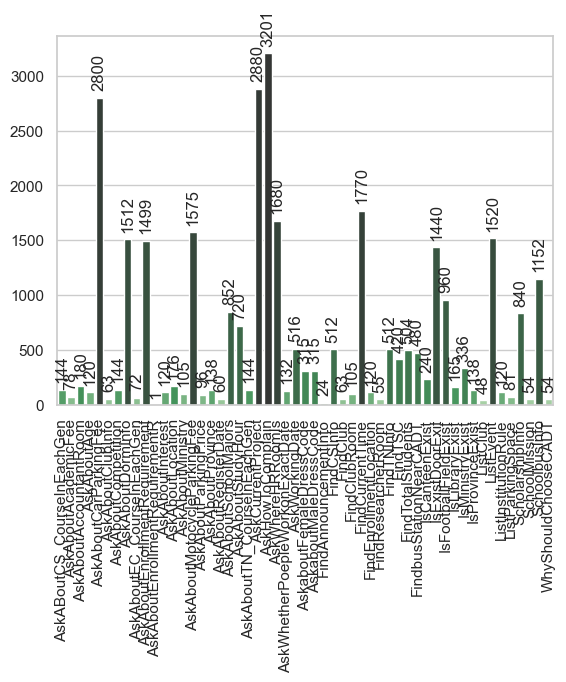

In [14]:
# plt.figure(figsize=(16,8))
sns.set(style="whitegrid", color_codes=True)

dataCount = allDataset.groupby("Intent").size()

aray = getPalleteAndArrangeValue(color="Greens_d", size=dataCount)

ax = sns.barplot(x=dataCount.index.tolist(), y=dataCount.values.tolist(), palette=aray)

plt.bar_label(ax.containers[0], padding=5, rotation=90)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

print(dataCount)
print("-------------------------")
plt.show()

In [15]:
# Find Total
print("Total Sentence length: ", allDataset.Question.count())

Total Sentence length:  31851


## Find Max Sentence Length

In [16]:
temp = pd.read_csv("all_data/all_segment_dataset.csv")

temp["Question_length"] = temp["Question"].apply(lambda x: len(x.split(" ")))
print(temp["Question_length"].describe())

max = temp["Question_length"].max()

print("Max Sentence Length: ", max)


count    29014.000000
mean        15.244709
std          3.614438
min          5.000000
25%         13.000000
50%         15.000000
75%         17.000000
max         30.000000
Name: Question_length, dtype: float64
Max Sentence Length:  30


## Find Max number of Intent

In [17]:
temp = pd.read_csv("all_data/all_data_dataset.csv")
len(temp["Intent"].unique())

54

## Check amount of entities as well as for any errors

In [18]:
entityDataFrame = pd.read_csv("all_data/all_entity_dataset.csv")
entityFrame = pd.read_csv("Named Entity.csv")
entityFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Named Entity  16 non-null     object
 1   NE Code       16 non-null     object
 2   Remarks       16 non-null     object
dtypes: object(3)
memory usage: 512.0+ bytes


In [19]:
# Remove white space from column name and apply it to csv file
# TODO: This is still experimenting, use with caution

# entityFrame = entityFrame.rename(columns={entityFrame.columns.values[1]: "Question"})
# entityFrame.to_csv("Named Entity.csv", index=False)

In [25]:
# Check total amount of entity number
entityDataFrame = pd.read_csv("all_data/all_entity_dataset.csv")
entityFrame = pd.read_csv("Named Entity.csv")

myDict = {}
errorDict = {}

entityTag = entityFrame["NE Code"].to_list()
entitySentences = entityDataFrame["Question"].to_list()

for x in entityTag:
    count = 0
    error = 0
    for index, row in entityDataFrame.iterrows():
        sentence = row["Question"].split()
        for c in range(len(sentence)):
            # Matches /B-Word until space
            if re.search(r"/B-{}$".format(x), sentence[c]):
                count += 1
                split = sentence[c].rsplit("/B-", maxsplit=1)[1]
                myDict.update({split: count})

            elif re.search(r"/B-{}.*[^\s]".format(x), sentence[c]):
                error += 1
                split = sentence[c].rsplit("/B-", maxsplit=1)[1]
                errorDict.setdefault(split, []).append({split: row["Intent"]})

            if re.search(r"/I-{}.*[^\s]".format(x), sentence[c]):
                error += 1
                split = sentence[c].rsplit("/I-", maxsplit=1)[1]
                errorDict.setdefault(split, []).append({split: row["Intent"]})

print(errorDict)

{'MAJOR': [{'MAJOR': 'FindCSInfo'}, {'MAJOR': 'FindCSInfo'}, {'MAJOR': 'FindCSInfo'}, {'MAJOR': 'FindCSInfo'}, {'MAJOR': 'FindCSInfo'}, {'MAJOR': 'FindCSInfo'}, {'MAJOR': 'FindCSInfo'}, {'MAJOR': 'FindCSInfo'}, {'MAJOR': 'FindCSInfo'}, {'MAJOR': 'FindCSInfo'}, {'MAJOR': 'FindCSInfo'}, {'MAJOR': 'FindCSInfo'}, {'MAJOR': 'FindCSInfo'}, {'MAJOR': 'FindCSInfo'}, {'MAJOR': 'FindCSInfo'}, {'MAJOR': 'FindCSInfo'}, {'MAJOR': 'FindCSInfo'}, {'MAJOR': 'FindCSInfo'}, {'MAJOR': 'FindCSInfo'}, {'MAJOR': 'FindCSInfo'}, {'MAJOR': 'FindCSInfo'}, {'MAJOR': 'FindCSInfo'}, {'MAJOR': 'FindCSInfo'}, {'MAJOR': 'FindCSInfo'}, {'MAJOR': 'FindCSInfo'}, {'MAJOR': 'FindCSInfo'}, {'MAJOR': 'FindCSInfo'}, {'MAJOR': 'FindCSInfo'}, {'MAJOR': 'FindCSInfo'}, {'MAJOR': 'FindCSInfo'}, {'MAJOR': 'FindCSInfo'}, {'MAJOR': 'FindCSInfo'}, {'MAJOR': 'FindCSInfo'}, {'MAJOR': 'FindCSInfo'}, {'MAJOR': 'FindCSInfo'}, {'MAJOR': 'FindCSInfo'}, {'MAJOR': 'FindCSInfo'}, {'MAJOR': 'FindCSInfo'}, {'MAJOR': 'FindCSInfo'}, {'MAJOR': 'Fin

  Intent  Amount
5    ORG   11690
1  BUILD    9835
2    PER    7563
0   ROOM    2601
4    GPE     669
7    JOB     368
6    MAJ     300
3   DATE      84


([<matplotlib.patches.Wedge at 0x179e9f53fc8>,
 [Text(0.48992740810353125, 0.9848711259799203, 'ORG'),
  Text(-1.0999454086359703, -0.010958924246860104, 'BUILD'),
  Text(0.09881120261760089, -1.09555298650374, 'PER'),
  Text(0.9565349555676591, -0.5431766552210953, 'ROOM'),
  Text(1.0767017065967557, -0.22519643649852403, 'GPE'),
  Text(1.093616196126245, -0.11833687324905402, 'JOB'),
  Text(1.098915666835216, -0.048829880033775246, 'MAJ'),
  Text(1.0999650625708723, -0.008767047590659771, 'DATE')],
 [Text(0.2672331316928352, 0.5372024323526837, '35.31'),
  Text(-0.5999702228923474, -0.005977595043741874, '29.70'),
  Text(0.05389701960960048, -0.5975743562747672, '22.84'),
  Text(0.5217463394005413, -0.29627817557514285, '7.86'),
  Text(0.5872918399618667, -0.12283441990828582, '2.02'),
  Text(0.59651792515977, -0.06454738540857492, '1.11'),
  Text(0.5994085455464814, -0.02663448001842286, '0.91'),
  Text(0.5999809432204758, -0.004782025958541693, '0.25')])

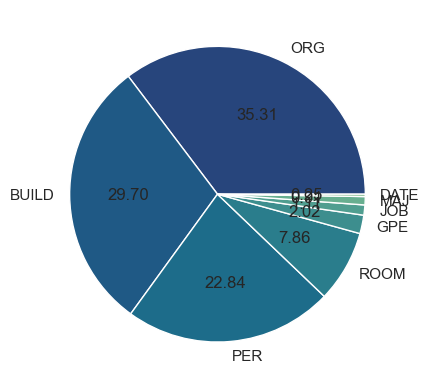

In [26]:
entityAmount = pd.DataFrame(myDict.items(), columns=["Intent", "Amount"])
entityAmount.sort_values(by=["Amount"], inplace=True, ascending=False)
print(entityAmount)
color = getPalleteAndArrangeValue("crest", entityAmount["Amount"])

plt.pie(x=entityAmount["Amount"], labels=entityAmount["Intent"], colors=color, autopct="%.2f")

# plt.show()

In [27]:
## Calculate the percentage

# Sum of Intent
totalIntentTag = sum(myDict[x] for x in myDict)
rise = ["{0:.2f}%".format(myDict[x] * 100 / totalIntentTag) for x in myDict]

entityAmount["Percentage"] = rise
entityAmount


,Intent,Amount,Percentage
5,ORG,11690,7.86%
1,BUILD,9835,29.70%
2,PER,7563,22.84%
0,ROOM,2601,0.25%
4,GPE,669,2.02%
7,JOB,368,35.31%
6,MAJ,300,0.91%
3,DATE,84,1.11%


## Count each word occurence